# **EXPLORAÇÃO, ANÁLISE E TRATAMENTO DOS DADOS: PROJETO PREVISÃO DE CANCER DE MAMA WISCONSIN (DIAGNOSTIC)**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de cancer de mama Wisconsin (diagnostico) benigno ou maligno

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
import numpy as np
import pandas as pd

In [2]:
dados = pd.read_csv('data_cancer2.csv',
                    sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

## **Exploração dos Dados**

In [4]:
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
dados.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
dados.shape

(918, 12)

## **Análise das Variáveis (Atributos)**

### **diagnosis = diagnóstico**

In [6]:
dados['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
dados['diagnosis'].value_counts().sort_index()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
import plotly.express as px

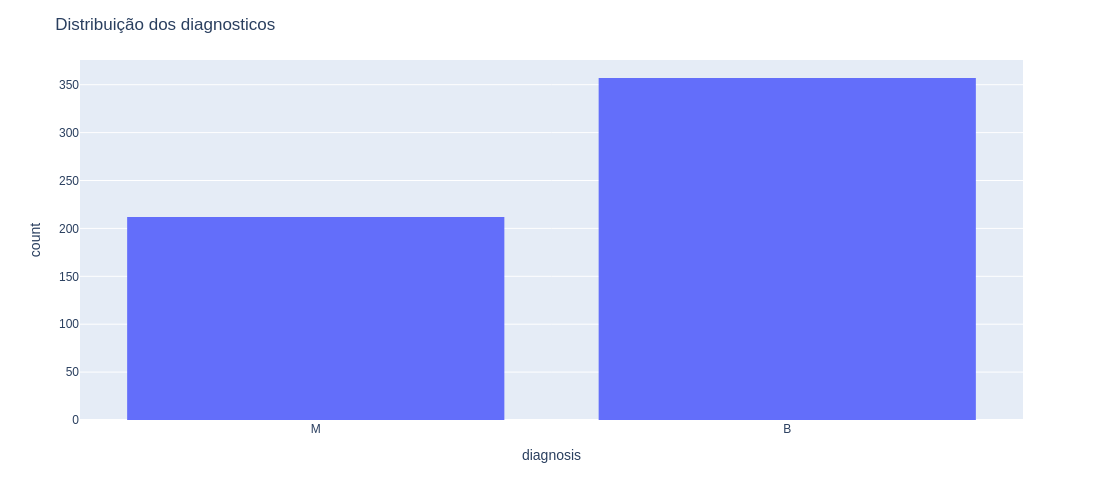

In [11]:
hist1 =  px.histogram (dados,  x = "diagnosis", nbins=100) 
hist1.update_layout(width=800,height=500,title_text='Distribuição dos diagnosticos') 
hist1.show()

In [12]:
import seaborn as sns

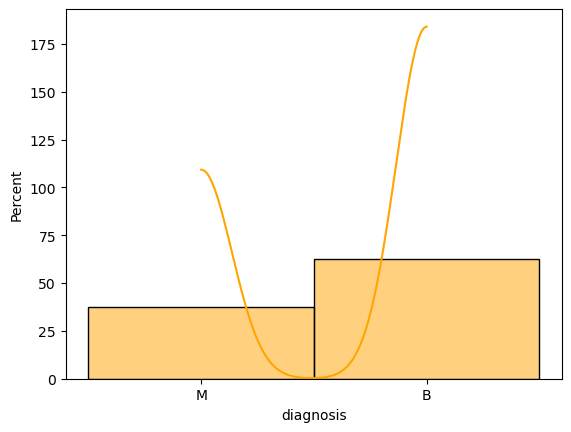

In [13]:
sns.histplot(dados, x='diagnosis', bins=30, color="orange", kde=True, stat="percent");

### **radius_mean = media do radio**

In [18]:
dados['radius_mean'].value_counts()

radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64

In [19]:
dados['radius_mean'].value_counts().sort_index()

radius_mean
6.981     1
7.691     1
7.729     1
7.760     1
8.196     1
         ..
25.220    1
25.730    1
27.220    1
27.420    1
28.110    1
Name: count, Length: 456, dtype: int64

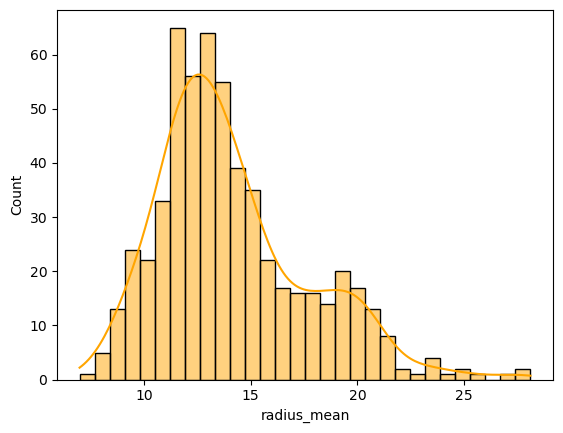

In [20]:
sns.histplot(dados, x='radius_mean', bins=30, color="orange", kde=True, stat="count");

## **Análise dos tipos de atributos.**

In [35]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
dados.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## **Valores Missing (NAN)**

In [36]:
# RELAÇÃO DA QUANTIDADE
dados.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [37]:
# FORMATO DOS DADOS
dados.shape

(569, 33)

In [38]:
# EXCLUIR VALORES MISSING
dados2 = dados.dropna()

In [39]:
dados2.shape

(0, 33)

In [28]:
dados2.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64

## **Análises Estatísticas Descritivas**

In [40]:
dados.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [41]:
dados.mode()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,8670,B,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,...,17.70,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427,NaN
1,8913,NaN,NaN,15.70,87.76,NaN,NaN,0.1206,NaN,NaN,...,27.26,105.9,402.8,0.1223,0.3416,NaN,NaN,0.2369,NaN,NaN
2,8915,NaN,NaN,16.84,134.70,NaN,NaN,NaN,NaN,NaN,...,NaN,117.7,439.6,0.1234,NaN,NaN,NaN,0.2383,NaN,NaN
3,9047,NaN,NaN,16.85,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,458.0,0.1256,NaN,NaN,NaN,0.2972,NaN,NaN
4,85715,NaN,NaN,17.46,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,472.4,0.1275,NaN,NaN,NaN,0.3109,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911157302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,911296201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,911296202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567,911320501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Tratando Valores Incoerentes**

**Excluindo coluna id**

In [48]:
dados2 = dados.drop(['id','Unnamed: 32'],axis=1)

In [49]:
dados2.shape

(569, 31)

In [50]:
dados2.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [51]:
dados2.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [57]:
dados2.mode()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1601,...,12.36,17.70,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427
1,NaN,NaN,15.70,87.76,NaN,NaN,0.1206,NaN,NaN,0.1714,...,NaN,27.26,105.9,402.8,0.1223,0.3416,NaN,NaN,0.2369,NaN
2,NaN,NaN,16.84,134.70,NaN,NaN,NaN,NaN,NaN,0.1717,...,NaN,NaN,117.7,439.6,0.1234,NaN,NaN,NaN,0.2383,NaN
3,NaN,NaN,16.85,NaN,NaN,NaN,NaN,NaN,NaN,0.1769,...,NaN,NaN,NaN,458.0,0.1256,NaN,NaN,NaN,0.2972,NaN
4,NaN,NaN,17.46,NaN,NaN,NaN,NaN,NaN,NaN,0.1893,...,NaN,NaN,NaN,472.4,0.1275,NaN,NaN,NaN,0.3109,NaN
5,NaN,NaN,18.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,489.5,0.1312,NaN,NaN,NaN,0.3196,NaN
6,NaN,NaN,18.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,546.7,0.1347,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,19.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,547.4,0.1401,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,20.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,624.1,0.1415,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,698.8,NaN,NaN,NaN,NaN,NaN,NaN


### **Análise de Outliers**

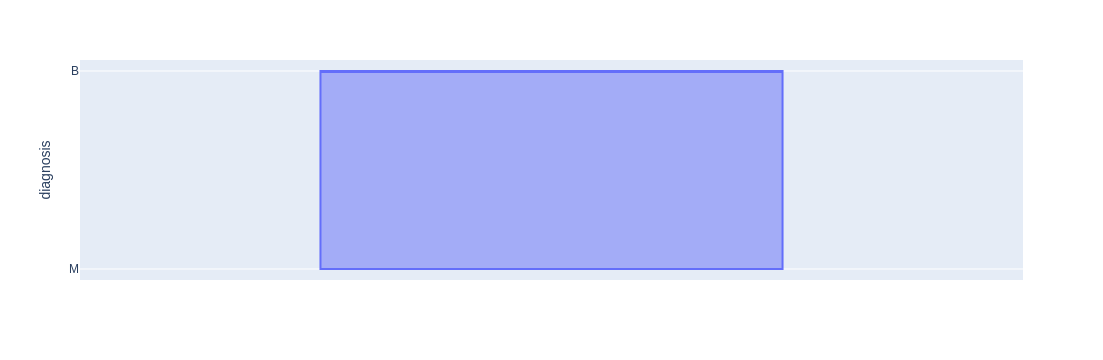

In [56]:
# Idade
px.box(dados2, y='diagnosis')

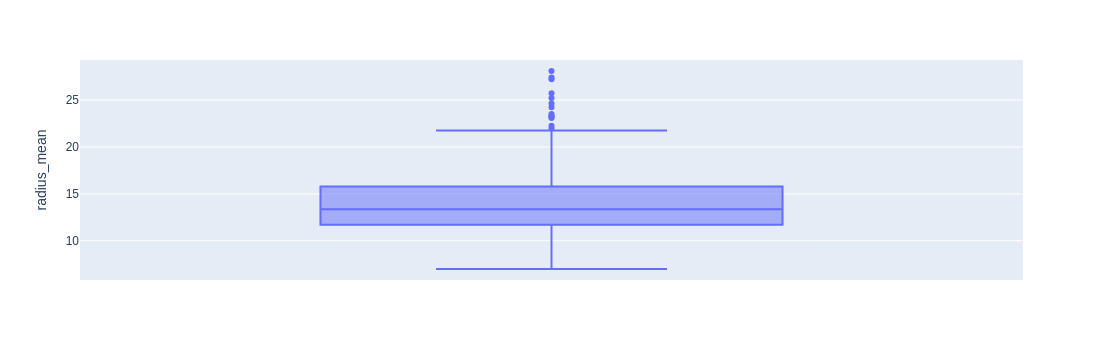

In [59]:
# Rádio Médio
px.box(dados2, y='radius_mean')

## **Salvando (Exportando) o Dataframe Tratado**

In [55]:
dados2.to_csv('data_cancer2_tratado.csv', sep=';', encoding='utf-8', index = False)